In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [5]:
train_data = pd.read_csv('/Users/amruthswarup/Downloads/Tech Files/Internships/Prodigy/Task-1/Dataset/train.csv')
test_data = pd.read_csv('/Users/amruthswarup/Downloads/Tech Files/Internships/Prodigy/Task-1/Dataset/test.csv')


In [7]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotRmsAbvGrd','SalePrice']

In [13]:
new_data = train_data[features]

In [15]:
new_data.head()

,GrLivArea,BedroomAbvGr,FullBath,HalfBath,TotRmsAbvGrd,SalePrice
0,1710,3,2,1,8,208500
1,1262,3,2,0,6,181500
2,1786,3,2,1,6,223500
3,1717,3,1,0,7,140000
4,2198,4,2,1,9,250000


In [17]:
new_data.isna().sum()

GrLivArea       0
BedroomAbvGr    0
FullBath        0
HalfBath        0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64

In [19]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1460 non-null   int64
 1   BedroomAbvGr  1460 non-null   int64
 2   FullBath      1460 non-null   int64
 3   HalfBath      1460 non-null   int64
 4   TotRmsAbvGrd  1460 non-null   int64
 5   SalePrice     1460 non-null   int64
dtypes: int64(6)
memory usage: 68.6 KB


In [21]:
new_data.describe()

,GrLivArea,BedroomAbvGr,FullBath,HalfBath,TotRmsAbvGrd,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,2.866438,1.565068,0.382877,6.517808,180921.195890
std,525.480383,0.815778,0.550916,0.502885,1.625393,79442.502883
min,334.000000,0.000000,0.000000,0.000000,2.000000,34900.000000
25%,1129.500000,2.000000,1.000000,0.000000,5.000000,129975.000000
50%,1464.000000,3.000000,2.000000,0.000000,6.000000,163000.000000
75%,1776.750000,3.000000,2.000000,1.000000,7.000000,214000.000000
max,5642.000000,8.000000,3.000000,2.000000,14.000000,755000.000000


In [23]:
cor=new_data.corr()
cor

,GrLivArea,BedroomAbvGr,FullBath,HalfBath,TotRmsAbvGrd,SalePrice
GrLivArea,1.000000,0.521270,0.630012,0.415772,0.825489,0.708624
BedroomAbvGr,0.521270,1.000000,0.363252,0.226651,0.676620,0.168213
FullBath,0.630012,0.363252,1.000000,0.136381,0.554784,0.560664
HalfBath,0.415772,0.226651,0.136381,1.000000,0.343415,0.284108
TotRmsAbvGrd,0.825489,0.676620,0.554784,0.343415,1.000000,0.533723
SalePrice,0.708624,0.168213,0.560664,0.284108,0.533723,1.000000


<Axes: >

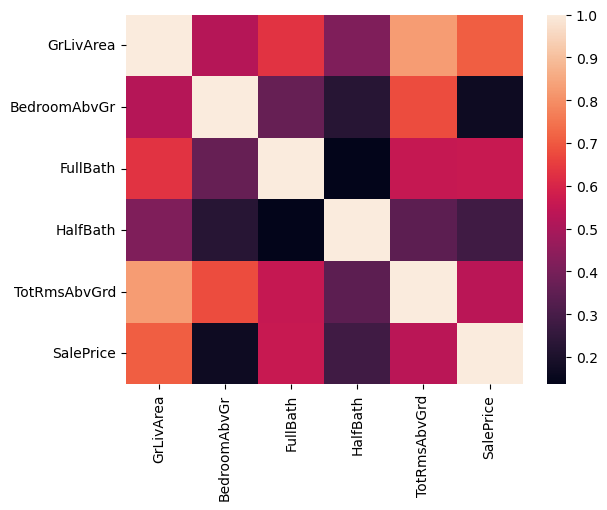

In [25]:
sns.heatmap(cor)

In [27]:
for column in train_data.columns:
    train_data[column].fillna(train_data[column].mean(), inplace=True)
    if column in test_data.columns:  #if missing values present in test_data
      test_data[column].fillna(test_data[column].mean(), inplace=True)

TypeError: Could not convert string 'RLRLRLRLRLRLRLRLRMRLRLRLRLRLRLRMRLRLRLRLRLRMRLRMRLRLRLRLRLRMC (all)RLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLFVRMRLRLRMRMRLRLRLFVRLRLRLRLRMRLRMRLRLRLRLRMRLRLRLRLRLRMRMRLRMRLRMRLRMRLRLRLRLRLFVC (all)RLRLRLRLC (all)RLRLRLRLRLRLRLRLRLRLRMFVRMRMRMRLRLRLRLRLRLFVRLRLRLRLRLRMRLRLRLRMRLRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRMRMRLRLRMRLRLRLRLRMRLRLRLFVRLRLRLRLRLRMRLRLRLRLRLRMRLRLRLRLRLRLRLRLRMFVRLRLRMRLRMRLRLRLRLRLRLRLRMRLRLRLRLRMRLRMRLRLRMRMRLRLRLRLRLRLRLFVRLRLRLRLRMRLRLRLRLRLRLRLRMRLRMRLRLRLRLRMRLRLRMRLRLRLRLFVRMRMRLRLRLRMRLRLRLRLRMRLRLRLRLFVRLRLRMRLRLRLRMRMRLRLRLRMRLFVRLRLRLRLRLRLRLRLRLRLFVRLRLRLFVRLRLRLRLRLRLRLRLRLRLRMFVRLRLRLRLRLRLRMRLRLRMRLRLRLRLRMRLRMRLRLFVRLRLRLRLRLRMRLRMRLRLRLRMRLRLRLRMRLRLRLRLRLRLRLRHRLRLRMRLRLRLRLRLRLRLRLRMRLRLRLRMRLRLRLRLRLRMRLRMRLRLRLRLRLRLRLRLRLRLRLFVRLRLRLFVRLRHRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMFVRLRLRLRLRLRLRLRLRLFVRLRLFVRMRLRLRLRLRLRLRMRLRLRLRLRMRLRLRLRLRMRMRMRLRMRLRMRMRLRLRLRLRMRLRLRLRLRLRMRMRMRLRLFVRLRLRMRLRMRLFVRLRLRLRLRMRLRLRLRLRLRLRMRLRLRLRLRLRLRMRLRLRMRMRLRLRLRLRLRMRMRLRLRLRMC (all)RLRLRLRLRMFVRLRLRLRMRLFVRMRLRLRLRLRLRLRLRLRLRLRLRLRLRMRLRLFVRLRLRLRLRLRMRLRLRLRLRLRLRLRLRLRLRLRHRLRLRLRLRMFVRLRMRLRLRLRMRLC (all)RLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLFVRMRLRLRLRMRMRLRLRLRLRMRLRLRLRMRLRLRMRLRLRMRLRMRLFVRLRLRLRLRLRLRLRLRLRLRMRLRLRLRLRLRLRLRLFVRLRLRLRLRLRLRMRLRLRLRLRHRMRMRLRLRLFVRLRLFVRLRLRLRLRMFVRLRLRMRLRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRHRLRLRLRLRMRLRLRLRLRHRLRLRLRLFVFVRLRLRMRLRLRLRMRLRMRLRLFVRLRLRLRMRLRMRLRLRLRLRLC (all)RLRLRLRLRMRLRLRLRLRMRLRLRLRLRLRLRLRMRLRLRLRLRLRMRLRLRLRLRMRLRLRLRLRLRLRMRLRLRMRLRLRLRLFVRLRLFVRLRLRMFVRLRLRLRLRLRLRLRLRLRLRLRLRMRLRLRHRLRLRLRLRLRMRLRMRLRMRLRLRLRLRLRLRLRLRLRLRLRLRMRLRLRLRLRLRLRLRMRLRMC (all)RLRLRLRLRLRLRLRLRMRLRLFVRLRMRLRLFVRLFVRLRLRLRLRMRMRLRLRHRMRLRLRMRLRLRLRLRLRMRLRLRLRLRLRLRLRLRLRLRLRLRLFVRLRLRLRLRLRLRLRLRLRMFVRLRLRLRLRLRLRLRLRLFVRLRLRLRLRLRLRLRLRLRLRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRHFVRMC (all)RLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRLRLRLRLRLRHRLRLRLRHRMRLRLFVRLRLRLRLRLRLRLRLRMRLRLRLRLFVRLFVRLFVRLRLRLRLRLRLRLRLRMRLRLFVRLRMRLRLRLRLRLRLRMRLRLRLRLRLRLRLRLRMRLRLRLRLRLRMRLRLRLRLRLRLRLRLRMRLRLRLRLRLRLRMRHRLRLRLRLRLRLRLRMRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLC (all)RMRMRLRLRLRLRMRLRLRLRLRLRLRLRLRLRMRLRLRLRLRLRLRLRMFVRMFVRLFVRLRLRLRLRMRLRMRLRLRLRLRLRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRLRLRLRLRLRLRLRLRMRLRLRMRLRLRMRLRLRLRLRLRLRLRLRLRMRLRLRMRMRLRLRLRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLFVRLRLRLRLRMRLRLRLRMRLRLRLRLRLRLRLRLRLFVRMRMRLRLRLRMRLRLRLRLRMRLRLRLRHRLRLRLRLRLRLRLRLRLRMFVRMRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRHRLRLRLRLRLRLRLRLRLRLRLFVRLRMRLRLRLRLRLRLRMRLRLRLRLRLRLRLRLRHFVRMRLRLRLRLRLRLRLRLRLRLRLRLC (all)RLRLRLRLRLRMRLRLRLRLRLRMRMRLRLRLRLRMRLRLRLRLRLRLRMRLRLRLRMRLRLRLRLRLRLRLRLFVRLRLRLRLRLRLRLRMRHRLRMRLRLRLRLRMRMRLRLRMRLRLRLRLRLRLRLRMRLRLRLRMRLRLRMRLRLRLRLRLFVRLRLRLRLRLFVFVRLRMRMRLRLRLRLRLFVRLRLRLRMRLRLRLRMRLRLRMRLRMRLRMRLRLRLRMRLRLRLRMRLRLRMRLRLRLRLRMRLRLRMRLRLRLRLRLRLRLRMRLRLRLRLRLRMRLRLRLRLRLRMRLRLRLRLRLRLRLRLRLRMRLRLRMFVRLRLRLRLRLRLRMRLRLRMRLFVRLRLRLRLRL' to numeric

In [ ]:
X=new_data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotRmsAbvGrd']]
y=new_data['SalePrice']

In [25]:
X.head()

,GrLivArea,BedroomAbvGr,FullBath,HalfBath,TotRmsAbvGrd
0,1710,3,2,1,8
1,1262,3,2,0,6
2,1786,3,2,1,6
3,1717,3,1,0,7
4,2198,4,2,1,9


In [37]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred=model.predict(X_val)

In [57]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_val,y_pred)
mae=mean_absolute_error(y_val,y_pred)
rmse=np.sqrt(mse)
print("Mean squre error :",mse)
print("Mean Absolute error",mae)
print("Rootmean squre error :",rmse)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-57-359afb33117c>, line 6)

In [45]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("R2:", score)
#display adjusted R-squared
print("Adjusted R2 :", 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.6337670693441046
0.6273643957312394


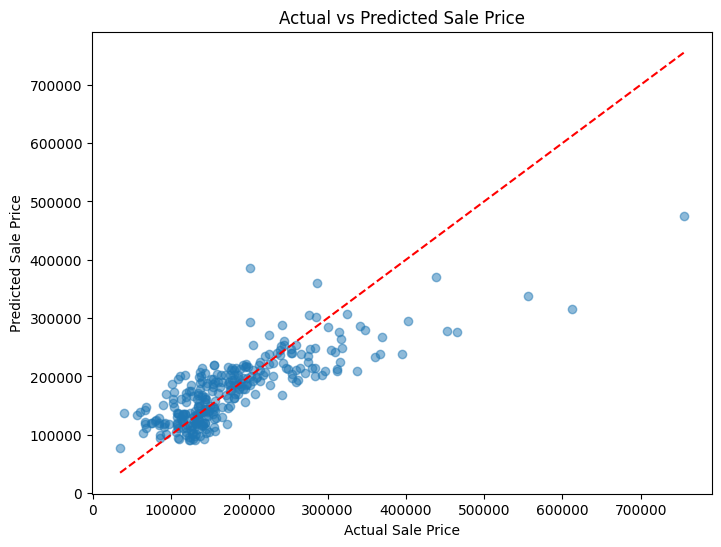

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

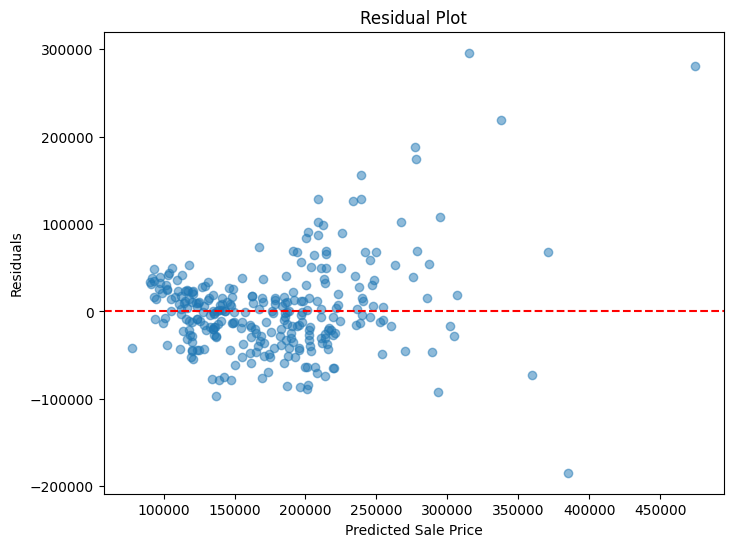

In [51]:
residuals = y_val - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

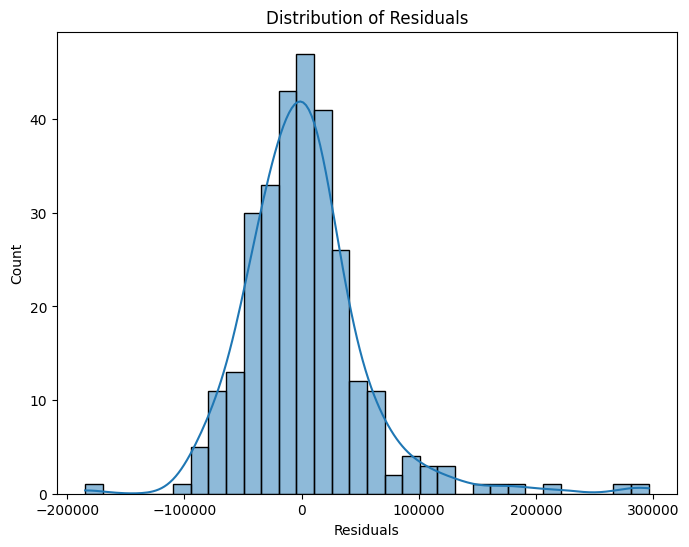

In [50]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


In [53]:
TESTING = pd.DataFrame({
    'GrLivArea': [1500],
    'BedroomAbvGr': [3],
    'FullBath': [2],
    'HalfBath': [1],
    'TotRmsAbvGrd': [5]
})
TESTING_prediction = model.predict(TESTING)
print(f'Testing Prediction: ${TESTING_prediction[0]:,.2f}')


Testing Prediction: $101,449,474.29


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [55]:

# Prepare the test data and make predictions
X_test = test_data[features[:-1]]
test_predictions = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [56]:
# Save predictions
final = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_predictions})
final.to_csv('final.csv', index=False)